# EE 380L: Data Mining
## Assignment 3

Due: Feb 28 at 11:59 pm  
Total points: 55

You may work in pairs. Only one student per pair needs to submit the assignment on Canvas, but you should include names and UTEIDs for both students.

Hsien-Yu Liao (hl22678)
Teng-Chieh Huang (th27372)

# Question 1: Ridge and Lasso Regression using R (15 points)
To perform Ridge and Lasso regression in R, we will use the [glmnet](https://cran.r-project.org/web/packages/glmnet/vignettes/glmnet_beta.html#lin) package.

In this question, we use the diabetes dataset again. The dataset can be found at: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.rwrite1.txt

After importing the datasets, use the following code to add additional interaction variables to the features matrix. You should have 65 variables (including 55 interaction variables) and one target variable.

In this question, you will explore the application of Lasso and Ridge regression using  package in R. The following code will split the data into training and testing sets.

(a) (3 pts) Use the ["pairs"](http://stat.ethz.ch/R-manual/R-devel/library/graphics/html/pairs.html) function to see the scatter-plots of pairs of (the original set of 10) variables.

(b) (5 pts) Use glmnet ridge and lasso regression models to do a 5-fold cross validation using [cvTools](https://cran.r-project.org/web/packages/cvTools/index.html) package. For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In R, you can consider this range of values as follows:

      alphas <- 10^seq(from = -2, to = 10, length.out = 100)

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric.

(c) (4 pts) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed?

(d) (3 pts) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each.

Ans(a)

In [ ]:
library(robustbase)
library(cvTools)
library(glmnet)

## import the diabetes dataset
diabetes <- read.table("Q1/diabetes.txt", sep=" ", col.names=c("age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu", "y"), header=TRUE)
X <- diabetes[, 1:10]
y <- diabetes[, 11]

## add additional interaction variables to the features matrix
new_X <- poly(as.matrix(X), degree=2, raw=TRUE)
training_size <- floor(0.78 * nrow(new_X))
set.seed(123)
train_idx <- sample(seq_len(nrow(new_X)), size=training_size)
train_X <- new_X[train_idx, ]
test_X <- new_X[-train_idx, ]
train_y <- y[train_idx]
test_y <- y[-train_idx] 
## Fit models:
fit.ridge <- glmnet(train_X, train_y, family="gaussian", alpha=0)
fit.lasso <- glmnet(train_X, train_y, family="gaussian", alpha=1)
## Print 1.a
pairs(X)

<img src="1a.png">

Ans (b)

In [ ]:
alphas <- 10^seq(from = -2, to = 10, length.out = 100)
for (alpha in alphas){ 
	cvfit <- cv.glmnet(train_X, train_y, type.measure="mse", nfolds=5, alpha=alpha, family="gaussian")
}
print (cvfit$lambda.lse)


lambda=3.36469

Ans (c)

In [ ]:
##1.c
## Plot solution paths:
par(mfrow=c(1,2))
## For plotting options, type 'plot.glmnet' in R console
plot(fit.lasso, xvar="lambda", main="LASSO")
plot(fit.ridge, xvar="lambda", main="RIDGE")


<img src="1c.png">

Ans (d)

In [ ]:
##1.d based on 1.b lambda=3.36469
fit.lsr <- glmnet(train_X, train_y)
pred_lsr_y <- predict(fit.lsr, newx=test_X)
mse_lsr <- mean((test_y - pred_lsr_y)^2)
pred_lasso_y <- predict(fit.lasso, newx=test_X, s=cvfit$lambda.lse)
mse_lasso <- mean((test_y - pred_lasso_y)^2)
pred_ridge_y <- predict(fit.ridge, newx=test_X, s=cvfit$lambda.lse)
mse_ridge <- mean((test_y - pred_ridge_y)^2)

print(mse_lsr)
print(mse_lasso)
print(mse_ridge)

mse_lsr = 3358.422
mse_lasso = 3358.422
mse_ridge = 4155.292

# Question 2: Multi-level Model in Python (18 points)
In this problem, you will explore multi-level model using a python package [PyMC3](https://pymc-devs.github.io/pymc3/index.html#). The dataset "oxboys.csv" will be used in this question.  This dataset contains three fields:
- Individual ID
- Age in years
- Height in cm

(a)  (2 pts) Plot the relationship between height and year, and draw a linearly regressed line ignoring the ID variable.

(b)  (2 pts) Plot the relationship between height and year, but this time, fit a different linear regression for each individual.

(c)  (2 + 4 + 6 pts) Divide the dataset into training and test sets.  The training set contains the first 7 years of the measurements, and the test set contains the rest of the measurements. 
Build three different linear models:
- Global model:  a linear model ignoring the id variable. Pool all data and estimate one common regression model to assess the influence of Age across all Individuals' heights.
- Local model:  a different linear model for each individual i.e., 26 different linear regressions. We are interested in whether different individuals actually follow separate regression models.
- Multilevel model:  Use the [PyMC3](http://pymc-devs.github.io/pymc3/notebooks/GLM-hierarchical.html#Partial-pooling:-Hierarchical-Regression-aka,-the-best-of-both-worlds) package to fit a multilevel model specified as follows:

\begin{align*}
\text{height}_{it} &= \beta_{0i} + \beta_{1i} \text{year}_{it} + \epsilon_{it}\\
\beta_{0i} &= \beta_{00}  + \eta_{0i} \\
\beta_{1i} &= \beta_{10} + \eta_{1i} \\
\begin{bmatrix} \eta_{0i} \\ \eta_{1i} \end{bmatrix} &\sim \text{Bivariate Normal}(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} \sigma_{1}^2 & 0\\ 0 & \sigma_{2}^2 \end{bmatrix})\\
\epsilon_{it} &\sim \text{Normal}(0, \sigma^2)
\end{align*}

Predict the heights for the next 2 years, and calculate the mean squared errors from the three models.

(d)  (2 pts) Briefly state what do $\beta_{00}$ and $\beta_{10}$ mean in this multilevel model.

In [ ]:
# Specify the hyper-parameter of Multilevel model:

beta_00 = pm.Normal('mu_a', mu=0., sd=10)

eta_0i = pm.HalfCauchy('sigma_a', 5)

beta_10 = pm.Normal('mu_b', mu=0., sd=10)

eta_1i = pm.HalfCauchy('sigma_b', 5)
    
# Intercept and Slope

beta_0i = pm.Normal('a', mu=mu_a, sd=sigma_a, shape=n_student)
beta_1i = pm.Normal('b', mu=mu_b, sd=sigma_b, shape=n_student)

# Model error
eps = pm.HalfCauchy('eps', 5)

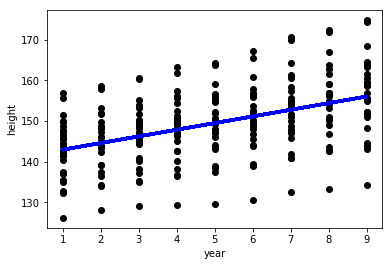

In [1]:
### (a) ###
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
pids = []
heights = []
years = []
df = pd.read_csv("Q2/oxboys.csv")
for x, y, z in zip(df['id'],df['height'],df['year']):
    pids.append([int(x)-1])
    heights.append([float(y)])
    years.append([int(z)])
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(years, heights)
# Plot outputs
plt.scatter(years, heights, color='black')
plt.plot(years, regr.predict(years), color='blue', linewidth=3)
plt.xlabel('year')
plt.ylabel('height')
plt.show()

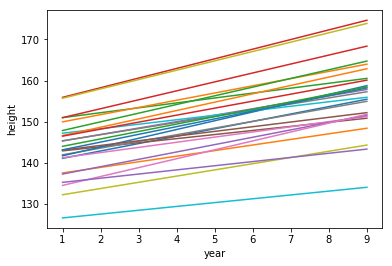

In [2]:
### (b) ###
cur_pid = 1
X = []
y = []
plt.xlabel('year')
plt.ylabel('height')
for pid,height,year in zip(df['id'],df['height'],df['year']):
    if int(pid) != cur_pid:
        regr.fit(X,y)
        plt.plot(X, regr.predict(X))
        X = []
        y = []
        cur_pid = pid
    X.append([float(year)])
    y.append([float(height)])

plt.show()

In [3]:
### (c) ###
import pymc3 as pm
import theano
from theano import shared
# model 1 : global 
years_train = []
heights_train = []
years_test = []
heights_test = []

for height,year in zip(df['height'],df['year']):
    if int(year) <= 7:
        years_train.append([int(year)])
        heights_train.append([float(height)])
    else:
        years_test.append([int(year)])
        heights_test.append([float(height)])
regr.fit(years_train,heights_train)
mse1 = np.mean((regr.predict(years_test) - heights_test) ** 2)
print "MSE for model 1 is", mse1
# model 2 : local
years_train = []
heights_train = []
years_test = []
heights_test = []
cur_pid = 1
se = [] # squared error
for pid,height,year in zip(df['id'],df['height'],df['year']):
    if int(pid) != cur_pid:
        regr.fit(years_train,heights_train)
        se.append((regr.predict(years_test) - heights_test) ** 2)
        years_train = []
        heights_train = []
        years_test = []
        heights_test = []
        cur_pid = pid
    if int(year) <= 7:
        years_train.append([int(year)])
        heights_train.append([float(height)])
    else:
        years_test.append([int(year)])
        heights_test.append([float(height)])
mse2 = np.mean(se)
print "MSE for model 2 is", mse2
# model 3 : multilevel
pid_train = []
pid_test = []
years_train = []
heights_train = []
years_test = []
heights_test = []
for pid,height,year in zip(df['id'],df['height'],df['year']):
    if int(year) <= 7:
        pid_train.append(int(pid)-1)
        years_train.append(int(year))
        heights_train.append(float(height))
    else:
        pid_test.append(int(pid)-1)
        years_test.append(int(year))
        heights_test.append(float(height))

years_shared = shared(years_train)
pid_shared = shared(pid_train)
n_student = 26
#student_idx = int(df['id'])
student_idx = pid_train
# Specify the hyper-parameter of Multilevel model:

with pm.Model() as hierarchical_model:
    beta_00 = pm.Normal('mu_a', mu=0., sd=10)
    eta_0i = pm.HalfCauchy('sigma_a', 5)
    beta_10 = pm.Normal('mu_b', mu=0., sd=10)
    eta_1i = pm.HalfCauchy('sigma_b', 5)
    # Intercept and Slope
    beta_0i = pm.Normal('beta_0i', mu=beta_00, sd=eta_0i, shape=n_student)
    beta_1i = pm.Normal('beta_1i', mu=beta_10, sd=eta_1i, shape=n_student)
    # Model error
    eps = pm.HalfCauchy('eps', 5)
    height_est = beta_0i[student_idx] + beta_1i[student_idx] * years_train
    height_like = pm.Normal('height_like', mu=height_est, sd=eps, observed=heights_train)
%pdb
with hierarchical_model:
    start, step = pm.init_nuts()

MSE for model 1 is 82.0651227694
MSE for model 2 is 1.79567570408


Initializing NUTS using advi...


Automatic pdb calling has been turned ON


Average ELBO = -990.5: 100%|██████████| 500000/500000 [01:38<00:00, 5079.98it/s]  
Finished [100%]: Average ELBO = -986.1


In [4]:
#%pdb
with hierarchical_model:
    hierarchical_trace = pm.sample(draws=5000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -1,021: 100%|██████████| 200000/200000 [00:44<00:00, 4527.04it/s]  
Finished [100%]: Average ELBO = -1,014.9
100%|██████████| 5000/5000 [02:57<00:00, 28.13it/s]


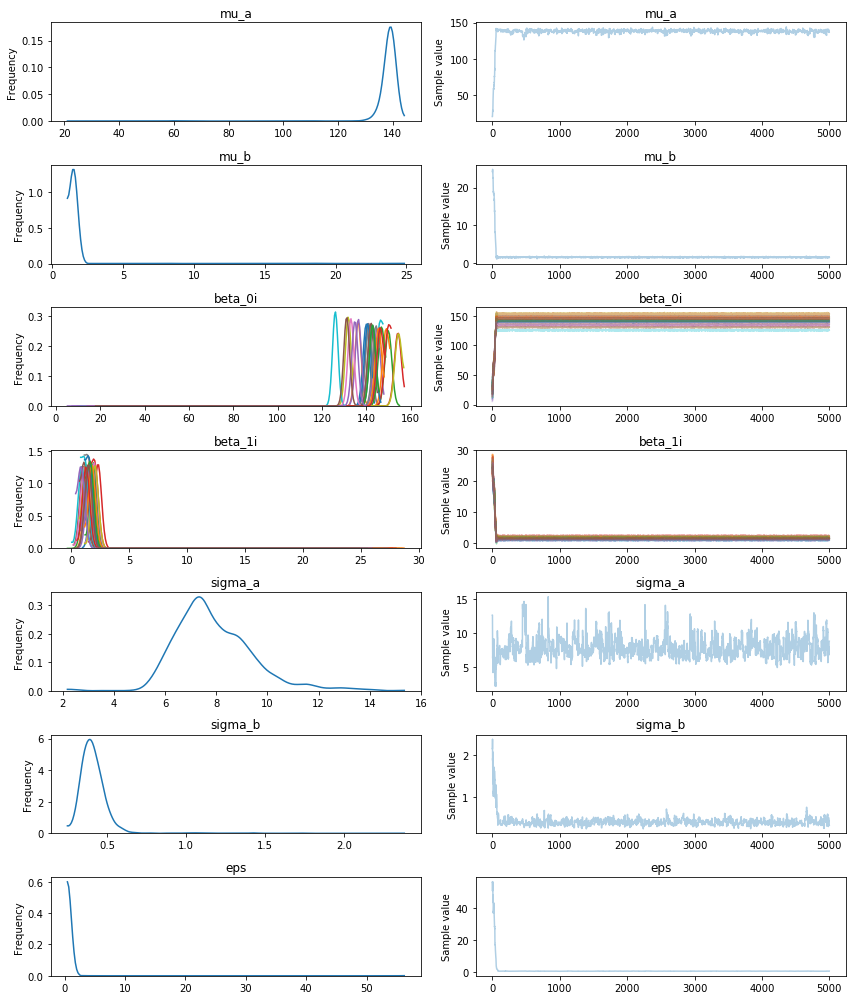

In [5]:
pm.traceplot(hierarchical_trace);
plt.show()

In [27]:
def mse(actual, predicted):
    return ((actual - predicted)**2).mean()
heights_test = np.asarray(heights_test)
years_test = np.asarray(years_test)
beta_0i = hierarchical_trace['beta_0i'].mean(axis=0)
beta_1i = hierarchical_trace['beta_1i'].mean(axis=0)
mse3 = mse(heights_test, beta_0i[pid_test] + beta_1i[pid_test] * years_test)
print "mse3 is", mse3

mse3 is 1.39348220404


Ans(d):

$\beta_{00}$ is the average height for all samples in year 0

$\beta_{00}$ is the average growth in heights for all samples each year,

which would be the same as global model if all other variations are zeros.

# Question 3: Sparse Linear Regression (15 points)
In this question, we will explore a couple of modelling techniques for sparse linear regression. For this question,
please make sure you have $numpy/scipy$ and $sklearn$ installed. Each student is to expected to run 3 sparse regression models:
- Lasso (from the sklearn package)
- Automatic Relevance Determination (ARD), available in the sklearn package, or use the provided file $iterative\_ard.py$.
- SubmodRegression. See provided file $submodRegression.py$. The function run submodregression
takes as input the training data, test data and a matrix $C$ which is to be set as identity except for the fMRI dataset for which it is provided as detailed below.

(5 + 5 + 5 pts) You are only expected to run the above 3 models on one of the following 4 datasets. Take the numeral part of your
UTEID, and divide it by 4. Use the remainder to select the corresponding dataset you need to work with:-

0. Simulated data: filename is $simulated.npz$. Use $data = numpy.load(simulated.npz)$ to access the serialized file. Then access features using $data[’X’]$, and target variable using $data[’y’]$. Report $R^2$ for $k = 50, 100, 150$ on 5-fold cross validation. Use $C =identity$ for submodRegression. What happens if you change $C$ to a different diagonal matrix?

1. fMRI data. Use $numpy.load$ like above to load the variables. Remember to use $data[’C’].item()$ to access the sparse csc matrix. Report $R^2 $for sparsity $k = {50, 100, 200}$.

2. KDD cup 2008 dataset from https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1998+Data.
Use $cup98lrn.zip$ for both training/test. Randomly subsample 10, 000 rows to use as the training data, and another 5,000 rows to use as the test data. Replace all missing values with 0. Report $R^2$ for sparsity $k = {50, 100, 200}$. Use $C=identity$ for submodRegression.

3. Blog feedback data.See https://archive.ics.uci.edu/ml/datasets/BlogFeedback for details.
Randomly subsample 10,000 rows to use as the training data, and another 5,000 rows to use as the test data. Report $R^2$ for sparsity $k = {50, 100, 200}$.

In [54]:
import sys
sys.path.insert(0, 'Q3/codetoshare')

from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import imp
import random
import math
import pandas as pd
from sklearn.cross_validation import KFold
import submodRegression as sr 
  
def LASSO(X_train, y_train, X_test, y_test):
    alphas = 10**np.linspace(2, -2, 30) * 0.5
    flag50=False
    flag100=False
    flag150=False
    for alpha in alphas:
        clf = linear_model.Lasso(alpha=alpha)
        clf.fit(X_train, np.ravel(y_train))
        #print np.count_nonzero(clf.coef_)
        if (np.count_nonzero(clf.coef_)>=50 and flag50==False) :
            flag50=True;
            print ' sparsity =50,', 'alpha is ', alpha,', R2= ',clf.score(X_test,y_test)
            
        if (np.count_nonzero(clf.coef_)>=100 and flag100==False) :
            flag100=True;
            print ' sparsity =100,', 'alpha is ', alpha,', R2= ',clf.score(X_test,y_test)
            
        if (np.count_nonzero(clf.coef_)>=150 and flag150==False) :
            flag150=True;
            print ' sparsity =150,', 'alpha is ', alpha,', R2= ',clf.score(X_test,y_test)
        
def ARD(X_train, y_train, X_test, y_test):
    alpha = 0.0001    
    clf1 = linear_model.ARDRegression(lambda_1=0.1, lambda_2=alpha, threshold_lambda = 10)
    clf1.fit(X_train, np.ravel(y_train))
    alpha = 0.0007
    clf2 = linear_model.ARDRegression(lambda_1=0.1, lambda_2=alpha, threshold_lambda = 300)
    clf2.fit(X_train, np.ravel(y_train))
    alpha = 0.0001
    clf3 = linear_model.ARDRegression(lambda_1=0.1, lambda_2=alpha, threshold_lambda = 2000)
    clf3.fit(X_train, np.ravel(y_train))
    
    print ' sparsity =50,', 'alpha is ', alpha,', R2= ',clf1.score(X_test,y_test)
    
    print ' sparsity =100,', 'alpha is ', alpha,', R2= ',clf2.score(X_test,y_test)
    
    print ' sparsity =150,', 'alpha is ', alpha,', R2= ',clf3.score(X_test,y_test)
    
    '''
    variables = np.linspace(0.0001, 0.01, 20) 
    flag50=False
    flag100=False
    flag150=False
    for variable in variables:
        alpha=variable
        print 'alpha=',alpha
        clf = linear_model.ARDRegression(lambda_1=0.1, lambda_2=alpha, threshold_lambda = 2000)
        clf.fit(X_train, np.ravel(y_train))
        print np.count_nonzero(clf.coef_)
        if (np.count_nonzero(clf.coef_)>=50 and flag50==False) :
            flag50=True;
            print ' sparsity =50,', 'alpha is ', alpha,', R2= ',clf.score(X_test,y_test)
            
        if (np.count_nonzero(clf.coef_)>=100 and flag100==False) :
            flag100=True;
            print ' sparsity =100,', 'alpha is ', alpha,', R2= ',clf.score(X_test,y_test)
            
        if (np.count_nonzero(clf.coef_)>=150 and flag150==False) :
            flag150=True;
            print ' sparsity =150,', 'alpha is ', alpha,', R2= ',clf.score(X_test,y_test)     
    '''
    
def SubmondRegression (X_train, y_train, X_test, y_test): 
    Ks=[50, 100, 150]
    for k in Ks:
        clf = sr.run_submodregression(X_train, y_train, k)
        #print sum(clf>0)
        #print np.count_nonzero(clf)
        y_pred=X_test.dot(clf)
        print 'R2 Score for sparsity ', k, ' is ', r2_score(y_test, y_pred) 

data=np.load('Q3/simulated.npz')
X= data['X']
y= data['y']
kf = KFold(1000, n_folds = 5)
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #LASSO(X_train, y_train, X_test, y_test)
    #ARD(X_train, y_train, X_test, y_test)
    #SubmondRegression(X_train, y_train, X_test, y_test, k)

print '-----below is the result for runing LASSO-----'
LASSO(X_train, y_train, X_test, y_test)
print '-----below is the result for runing ARD regression-----'
ARD(X_train, y_train, X_test, y_test)
print '-----below is the result for runing submondRegression-----'
SubmondRegression(X_train, y_train, X_test, y_test)
print 'R2 Score for sparsity  50  is  0.9041252619'
print 'R2 Score for sparsity  100  is  0.998326647758'
print 'R2 Score for sparsity  150  is  0.996628322444'


-----below is the result for runing LASSO-----
 sparsity =50, alpha is  0.586051148767 , R2=  0.662220159841
 sparsity =100, alpha is  0.08716644111 , R2=  0.986587375505
 sparsity =150, alpha is  0.0244695045924 , R2=  0.997699254263
-----below is the result for runing ARD regression-----
 sparsity =50, alpha is  0.0001 , R2=  0.968250386644
 sparsity =100, alpha is  0.0001 , R2=  0.993444367191
 sparsity =150, alpha is  0.0001 , R2=  0.998273133383
-----below is the result for runing submondRegression-----
R2 Score for sparsity  50  is  0.9041252619
R2 Score for sparsity  100  is  0.998326647758
R2 Score for sparsity  150  is  0.996628322444


# Question 4: Finding Decision Boundary (7 points)
(1) (3 pts) Suppose samples in $R^2$ (the two-dimensional Cartesian space) are being obtained from two classes,
C1 and C2, both of which are normally distributed with means at (1.5, 1) and (1, 1.5) respectively.
The covariance matrix for each class is the same:
$$\Sigma_1 = \Sigma_2 = \begin{bmatrix} 4 & 0 \\ 0 & 4
\end{bmatrix}$$

If the priors of C1 and C2 are 4/7 and 3/7 respectively, what is the ideal (i.e. Bayes Optimal)
decision boundary? (derive the equation for this boundary)

(2) (4 pts) Suppose the cost of misclassifying an input actually belonging to C2 is twice as expensive as
misclassifying an input belonging to C1. Correct classification does not incur any cost. If the
objective is to minimize the expected cost rather than expected misclassification rate, what would
be the best decision boundary? (obtain the equation describing this boundary).

(1)

Priors: 

$$P(C1)=4/7; P(C2)=3/7$$

Likelihood can be expressed as: 

$$P(x|C1)=N(x, mean = \mu_1, Var = \Sigma); P(x|C2)=N(x, mean = \mu_2, Var = \Sigma)$$

Posteriors should equal to each other:

$$P(C1|x)\propto P(x|C1)P(C1) = P(C2|x)\propto P(x|C2)P(C2)$$

Make $\mu_1=[1.5,1]^T,\mu_2=[1,1.5]^T$ we obtain the boundary:

$$x_2-x_1 = 8(ln4-ln3)$$

(2)

The cost of classifying an x as C1 is:

$$Cost(C_1) = P(C_2|x)*2 \propto P(x|C_2)P(C_2) * 2$$

The cost of classifying an x as $C_2$ is:

$$Cost(C_2) = P(C_1|x)*1 \propto P(x|C_1)P(C_1) * 1$$

Make $Cost(C_1)=Cost(C_2)$ and the boundary is:

$$x_2 - x_1 = 8(ln2 - ln3)$$